NRCS Triangle Method for Peak Discharge (Duration == Tc)
Area: 50.00 acres
Intensity: 3.00 inches per hour
Runoff Coefficient: 50.00 dimensionless
Peak Discharge Rate: 75.60 CFS


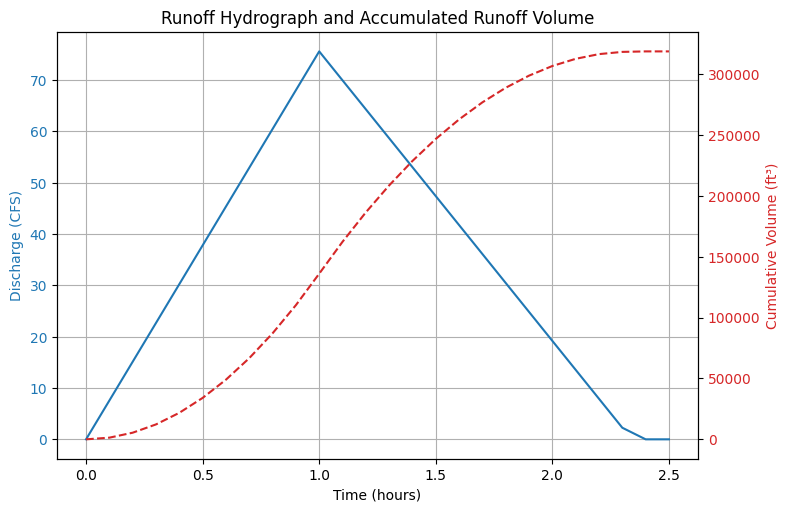

Total Runoff: 318670.93 cubic feet


In [6]:
# NRCS Method Tools
import matplotlib.pyplot as plt
#
def qpeak(c,i,a,k=1):
    qpeak = k*c*i*a
    return qpeak
################################
def nrcs_triangle_hydrograph(qp, time, tc):
    if time < 0:
        nrcs_triangle_hydrograph = 0.0
    elif 0 <= time <= tc:
        nrcs_triangle_hydrograph = (qp / tc) * time
    elif tc < time <= 2.34 * tc:
        nrcs_triangle_hydrograph = (qp / tc) * time - ( (qp / tc) * (time - tc) ) - ( (qp /1.34*tc) * (time - tc) )
    else:
        nrcs_triangle_hydrograph = 0.0
    return nrcs_triangle_hydrograph
############################
# Problem 2
# NRCS Triangular uses same meanings, but recession limb is 1.34 tc
a = 50 # acres given
I = 3 # in/hr given
c = 0.5 # given
tc = 1.0 #hr implied(given)
k = 1.008 #unit conversion 1.008 for US  1/360 for SI
qp=qpeak(c,I,a,k)
print("NRCS Triangle Method for Peak Discharge (Duration == Tc)")
print(f"Area: {a:.2f} acres")
print(f"Intensity: {I:.2f} inches per hour")
print(f"Runoff Coefficient: {a:.2f} dimensionless")
print(f"Peak Discharge Rate: {qpeak(c, I, a, k):.2f} CFS")
# Recalculate discharge and cumulative runoff
qp = qpeak(c,I,a,k)
time = [] # empty list
discharge = [] #empty list
deltat = 0.1 # 6 minutes in hours
howmanysteps = 26
time.append(0.0)
discharge.append(0.0)
for i in range(1,howmanysteps):
    time.append(time[i-1]+deltat)
    discharge.append(nrcs_triangle_hydrograph(qp,time[i],tc))
# Trapezoidal integration to compute cumulative volume
cumulative_volume = [0.0]
for i in range(1, howmanysteps):
    deltaV = 0.5 * (discharge[i] + discharge[i-1]) * deltat * 3600  # ft³
    cumulative_volume.append(cumulative_volume[i-1] + deltaV)
# Plotting both discharge and accumulated volume
fig, ax1 = plt.subplots(figsize=(8, 5))
color = 'tab:blue'
ax1.set_xlabel("Time (hours)")
ax1.set_ylabel("Discharge (CFS)", color=color)
ax1.plot(time, discharge, color=color, label="Discharge (CFS)")
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)
ax2 = ax1.twinx()  # instantiate second axes sharing the same x-axis
color = 'tab:red'
ax2.set_ylabel("Cumulative Volume (ft³)", color=color)
ax2.plot(time, cumulative_volume, color=color, linestyle='--', label="Accumulated Volume")
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title("Runoff Hydrograph and Accumulated Runoff Volume")
plt.show()
# Final print
print(f"Total Runoff: {cumulative_volume[-1]:.2f} cubic feet")